In [4]:
import numpy as np
from numpy import *
import matplotlib
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
import requests
import pickle
import re
import itertools
import functools
import collections
import string
import time
from bs4 import BeautifulSoup
from sortedcontainers import SortedList # http://www.grantjenks.com/docs/sortedcontainers/sortedlist.html#sortedlist

from adventlib.common import *
# n, m, a = lines_as_matrix_nm(lines)
# a = lines_as_matrix(lines)
# a = lines_as_digit_matrix(lines)
# chunks = split_iter_by_start_indices(a, indices)
# chunks = split_iter_by_bools(a, bools)

from adventlib.point_2d import *
# from adventlib.point_3d import *

YEAR = 2022
DAY = int('12')

submit1, submit2 = generate_submits(YEAR, DAY)

while True:
  try:
    raw_input = get_input(YEAR, DAY)
    break
  except Exception as e:
    print(e)
    time.sleep(1)

In [27]:
lines, groups = linesplit("""
Sabqponm
abcryxxl
accszExk
acctuvwj
abdefghi
""".strip())

In [35]:
lines, groups = linesplit(raw_input, verbose=True)

41 lines
1 groups
>>>
abcccccccaaaaaccccaaaaaaaccccccccccccccccccccccccccccccccccccaaaaa
abaacccaaaaaaccccccaaaaaaaaaaaaaccccccccccccccccccccccccccccaaaaaa
abaacccaaaaaaaccccaaaaaaaaaaaaaacccccccccccccaacccccccccccccaaaaaa
...


In [48]:
lines

['abcccccccaaaaaccccaaaaaaaccccccccccccccccccccccccccccccccccccaaaaa',
 'abaacccaaaaaaccccccaaaaaaaaaaaaaccccccccccccccccccccccccccccaaaaaa',
 'abaacccaaaaaaaccccaaaaaaaaaaaaaacccccccccccccaacccccccccccccaaaaaa',
 'abaacccccaaaaaacaaaaaaaaaaaaaaaacccccccccccccaacccccccccccccacacaa',
 'abaccccccaaccaacaaaaaaaaaacccaacccccccccccccaaacccccccccccccccccaa',
 'abcccccccaaaacccaaaaaaaaacccccccccccccaaacccaaacccccccccccccccccaa',
 'abccccccccaaaccccccccaaaacccccccccccccaaaaacaaaccacacccccccccccccc',
 'abccccccccaaacaaacccccaaacccccccccccccaaaaaaajjjjjkkkcccccaacccccc',
 'abcccccaaaaaaaaaacccccaaccccccccccciiiiiijjjjjjjjjkkkcaaaaaacccccc',
 'abcccccaaaaaaaaacccccccccccccccccciiiiiiijjjjjjjrrkkkkaaaaaaaacccc',
 'abcccccccaaaaaccccccccccccccccccciiiiiiiijjjjrrrrrppkkkaaaaaaacccc',
 'abcccaaccaaaaaacccccccccccaacaaciiiiqqqqqrrrrrrrrpppkkkaaaaaaacccc',
 'abccaaaaaaaaaaaaccccacccccaaaaaciiiqqqqqqrrrrrruuppppkkaaaaacccccc',
 'abcccaaaaaaacaaaacaaacccccaaaaaahiiqqqqtttrrruuuuupppkkaaaaacccccc',
 'abca

In [36]:
n, m, a = lines_as_matrix_nm(lines)

In [37]:
A = zeros((n, m), dtype=int)
start = None
end = None

for i in range(n):
  for j in range(m):
    c = ord(a[i, j]) - ord('a')
    if a[i, j] == 'S':
      c = 0
      start = Point(i, j)
    if a[i, j] == 'E':
      c = 25
      end = Point(i, j)
    A[i, j] = c

In [38]:
a

array([['a', 'b', 'c', ..., 'a', 'a', 'a'],
       ['a', 'b', 'a', ..., 'a', 'a', 'a'],
       ['a', 'b', 'a', ..., 'a', 'a', 'a'],
       ...,
       ['a', 'b', 'a', ..., 'c', 'a', 'a'],
       ['a', 'b', 'a', ..., 'a', 'a', 'a'],
       ['a', 'b', 'a', ..., 'a', 'a', 'a']], dtype='<U1')

In [39]:
q = collections.deque()
q.appendleft(start)
d = {
  start: 0,
}

while q:
  t = q.popleft()
  
  for dir in DIRS4:
    tt = t + dir
    
    if tt.x < 0 or tt.x >= n or tt.y < 0 or tt.y >= m:
      continue
    # print(tt)
    
    if A[tt.x, tt.y] - A[t.x, t.y] > 1:
      continue
      
    z = d[t] + 1
      
    if tt in d and d[tt] <= z:
      continue
    
    d[tt] = z
    q.append(tt)

In [40]:
d

{[+20, +0]: 0,
 [+20, +1]: 1,
 [+21, +0]: 1,
 [+19, +0]: 1,
 [+20, +2]: 2,
 [+21, +1]: 2,
 [+19, +1]: 2,
 [+22, +0]: 2,
 [+18, +0]: 2,
 [+20, +3]: 3,
 [+21, +2]: 3,
 [+19, +2]: 3,
 [+22, +1]: 3,
 [+18, +1]: 3,
 [+23, +0]: 3,
 [+17, +0]: 3,
 [+21, +3]: 4,
 [+19, +3]: 4,
 [+22, +2]: 4,
 [+18, +2]: 4,
 [+23, +1]: 4,
 [+17, +1]: 4,
 [+24, +0]: 4,
 [+16, +0]: 4,
 [+21, +4]: 5,
 [+22, +3]: 5,
 [+18, +3]: 5,
 [+23, +2]: 5,
 [+24, +1]: 5,
 [+17, +2]: 5,
 [+16, +1]: 5,
 [+25, +0]: 5,
 [+15, +0]: 5,
 [+21, +5]: 6,
 [+22, +4]: 6,
 [+23, +3]: 6,
 [+24, +2]: 6,
 [+25, +1]: 6,
 [+17, +3]: 6,
 [+16, +2]: 6,
 [+15, +1]: 6,
 [+26, +0]: 6,
 [+14, +0]: 6,
 [+22, +5]: 7,
 [+23, +4]: 7,
 [+24, +3]: 7,
 [+25, +2]: 7,
 [+26, +1]: 7,
 [+17, +4]: 7,
 [+16, +3]: 7,
 [+15, +2]: 7,
 [+14, +1]: 7,
 [+27, +0]: 7,
 [+13, +0]: 7,
 [+25, +3]: 8,
 [+26, +2]: 8,
 [+27, +1]: 8,
 [+17, +5]: 8,
 [+18, +4]: 8,
 [+16, +4]: 8,
 [+15, +3]: 8,
 [+14, +2]: 8,
 [+13, +1]: 8,
 [+28, +0]: 8,
 [+12, +0]: 8,
 [+26, +3]: 9,
 [+27, +2]

In [41]:
d[end]

339

In [42]:
submit1(_)

Already submitted (2022, 12, 1, 339): True


True

In [43]:
res = {}

for i in range(n):
  for j in range(m):
    if A[i, j] != 0:
      continue
    
    start = Point(i, j)
    q = collections.deque()
    q.appendleft(start)
    d = {
      start: 0,
    }

    while q:
      t = q.popleft()

      for dir in DIRS4:
        tt = t + dir

        if tt.x < 0 or tt.x >= n or tt.y < 0 or tt.y >= m:
          continue
        # print(tt)

        if A[tt.x, tt.y] - A[t.x, t.y] > 1:
          continue

        z = d[t] + 1

        if tt in d and d[tt] <= z:
          continue

        d[tt] = z
        q.append(tt)
    
    if end in d:
      res[start] = d[end]

In [44]:
res

{[+0, +0]: 359,
 [+1, +0]: 358,
 [+1, +2]: 358,
 [+1, +3]: 359,
 [+2, +0]: 357,
 [+2, +2]: 357,
 [+2, +3]: 358,
 [+3, +0]: 356,
 [+3, +2]: 356,
 [+3, +3]: 357,
 [+4, +0]: 355,
 [+4, +2]: 355,
 [+5, +0]: 354,
 [+6, +0]: 353,
 [+7, +0]: 352,
 [+8, +0]: 351,
 [+9, +0]: 350,
 [+10, +0]: 349,
 [+11, +0]: 348,
 [+12, +0]: 347,
 [+13, +0]: 346,
 [+14, +0]: 345,
 [+15, +0]: 344,
 [+16, +0]: 343,
 [+17, +0]: 342,
 [+18, +0]: 341,
 [+18, +2]: 341,
 [+18, +3]: 342,
 [+19, +0]: 340,
 [+19, +2]: 340,
 [+19, +3]: 341,
 [+20, +0]: 339,
 [+20, +2]: 339,
 [+20, +3]: 340,
 [+21, +0]: 338,
 [+21, +2]: 338,
 [+21, +3]: 339,
 [+21, +4]: 340,
 [+21, +5]: 341,
 [+22, +0]: 337,
 [+22, +2]: 337,
 [+22, +3]: 338,
 [+22, +4]: 339,
 [+22, +5]: 340,
 [+23, +0]: 336,
 [+23, +2]: 336,
 [+23, +3]: 337,
 [+23, +4]: 338,
 [+24, +0]: 335,
 [+24, +2]: 335,
 [+24, +3]: 336,
 [+25, +0]: 334,
 [+25, +2]: 334,
 [+25, +3]: 335,
 [+26, +0]: 333,
 [+27, +0]: 332,
 [+28, +0]: 333,
 [+29, +0]: 334,
 [+29, +2]: 334,
 [+30, +0]: 33

In [46]:
min(list(res.values()))

332

In [47]:
submit2(_)

Submitting 332...


True

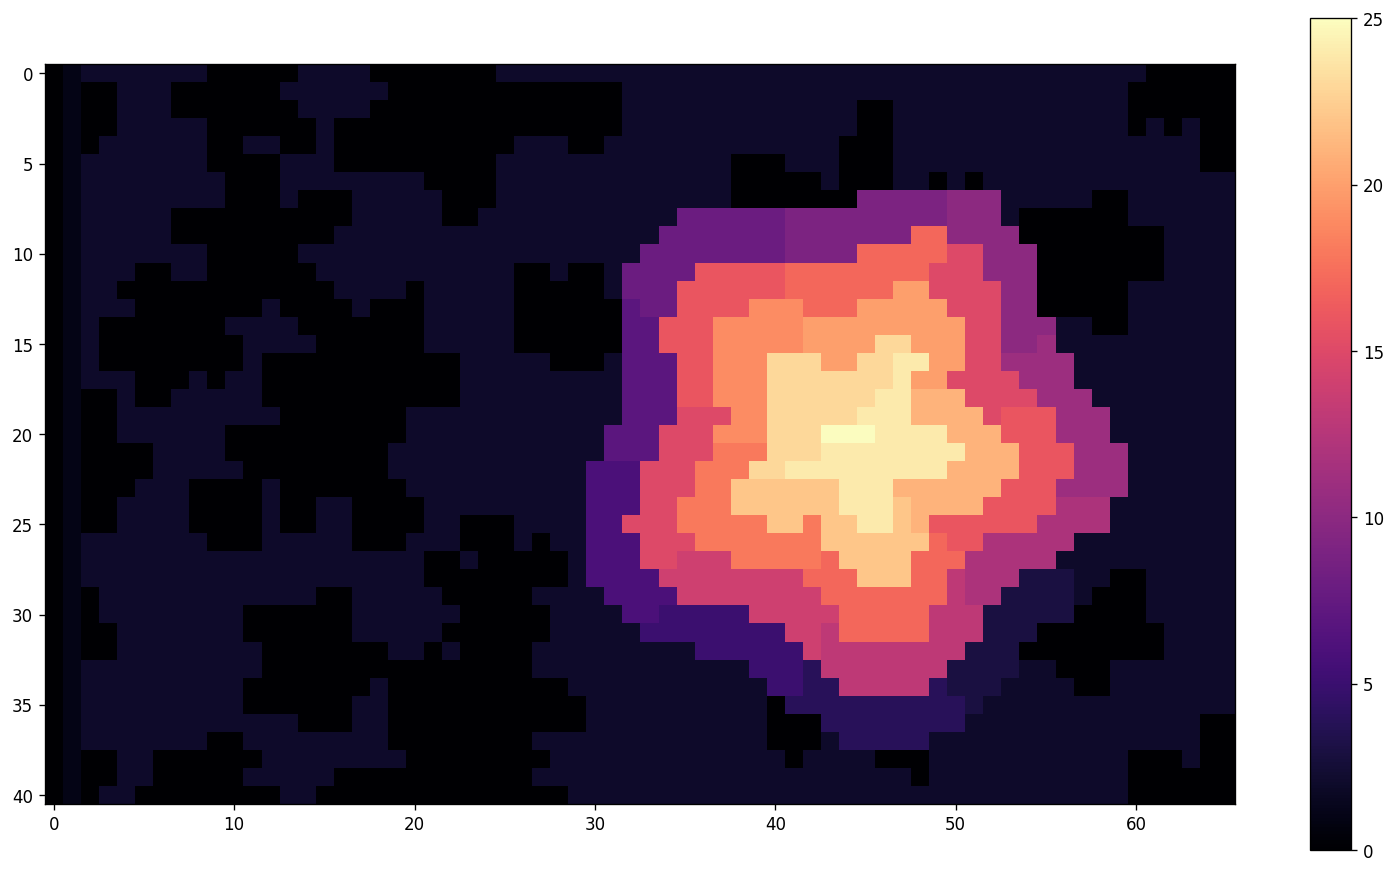

In [58]:
plt.imshow(A, cmap=plt.colormaps.get('magma'))
plt.colorbar()

In [63]:
n, m, a = lines_as_matrix_nm(lines)

A = zeros((n, m), dtype=int)
start = None
end = None

for i in range(n):
  for j in range(m):
    if a[i, j] == 'S':
      c = 0
      start = Point(i, j)
    elif a[i, j] == 'E':
      c = 25
      end = Point(i, j)
    else:
      c = ord(a[i, j]) - ord('a')

    A[i, j] = c

res = {}

for i in range(n):
  for j in range(m):
    if A[i, j] != 0:
      continue
    
    start = Point(i, j)
    q = collections.deque([start])
    d = {
      start: 0,
    }

    while q:
      t = q.popleft()

      for dir in DIRS4:
        tt = t + dir

        if tt.x < 0 or tt.x >= n or tt.y < 0 or tt.y >= m:
          continue
        # print(tt)

        if A[tt.x, tt.y] - A[t.x, t.y] > 1:
          continue

        if tt in d and d[tt] <= d[t] + 1:
          continue

        d[tt] = d[t] + 1
        q.append(tt)
    
    if end in d:
      res[start] = d[end]

min(list(res.values()))

332

In [68]:
sum(A == 0) * n * m * np.log(n * m)

16766727.287629485